In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_unite

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, timescale=20, worker_id=69)

WAVE environment created.


In [4]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 512
ppo_epochs = 10
clip = 0.2
minibatch_size = 128
model = ppo_unite.PPO(127, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip, lr=1e-4)

In [5]:
save_path = f'./results/env01/ppo/512-128-ppounite-normalize-complexlayers-tesst-timescale-20'
model.set_model_save_path(save_path)

In [6]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


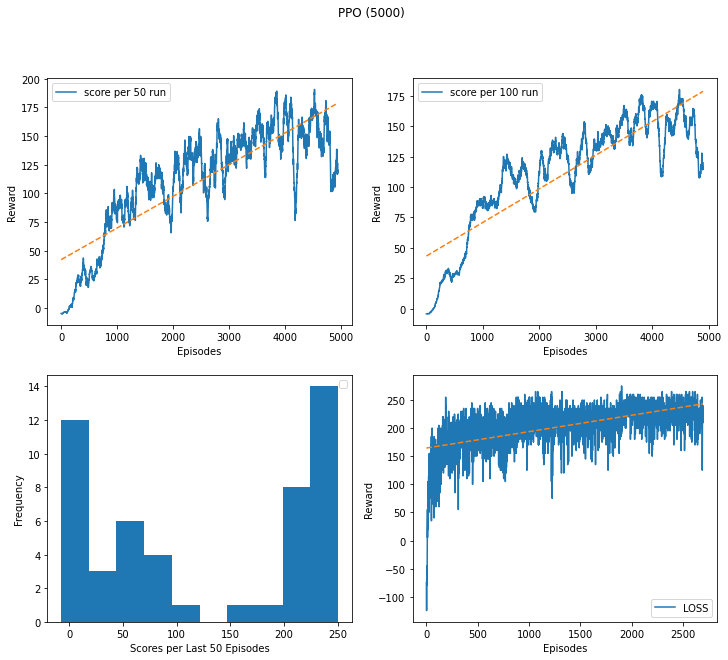

Model saved
Training history saved
saved to ./results/env01/ppo/512-128-ppounite-normalize-complexlayers-tesst-timescale-20
epoch: 4999, total timestep: 2697367, total reward: 214.99997030198574, timestep: 1000, lr: 3.4867844010000016e-05


In [6]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True)

In [7]:
model.save_model()

Model saved
Training history saved


In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

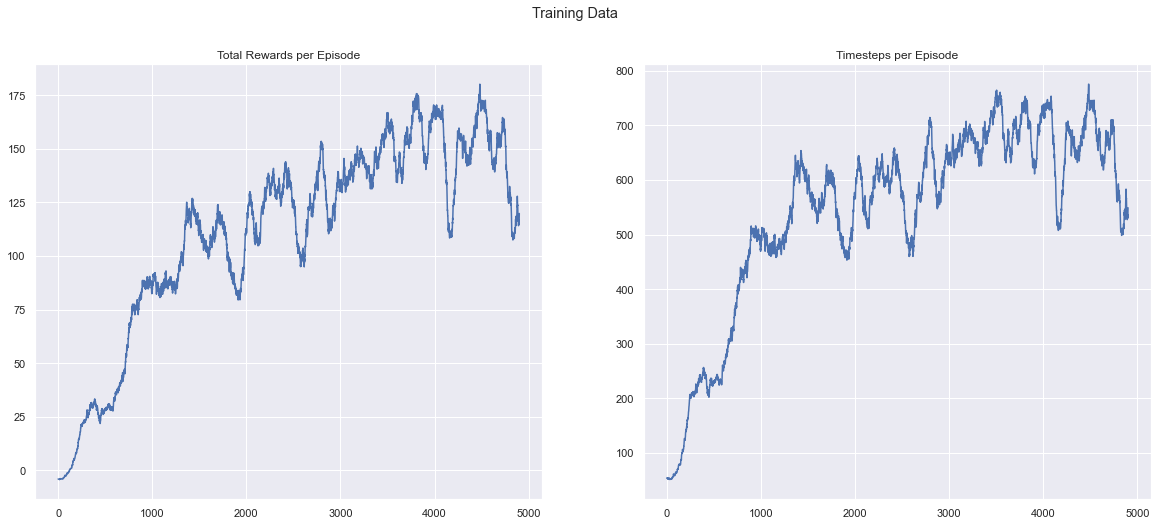

In [8]:
model.plot_train_memory(smooth=100)

In [8]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

WAVE environment created.


(300.309961527586, 1394)

In [7]:
env = wave.WaveEnv(env_path, 20, worker_id=12311)
model.test_avg(env, 100)

WAVE environment created.
1065.7498681098223 4485
886.6498783826828 3567
2468.5996804088354 10128
916.5298839509487 3870
4583.949434012175 18421
1111.4898618906736 4371
1023.839872866869 4324
755.5699101239443 3089
1472.2398080825806 5956
369.55994810163975 1609
904.1198851019144 3818
194.8199734389782 904
1158.789849087596 4825
3290.2695937901735 13395
4215.519477024674 17190
2086.50972661376 8470
965.3198743313551 3994
222.2799675166607 1055
80.46998888254166 491
51.97999283671379 261
1967.9897497296333 7741
7117.559117347002 28149
3773.5095182061195 15330
681.8999093174934 2762
-10.039999663829803 101
3054.329620361328 12514
549.4199269413948 2412
506.9899392724037 2161
1096.879854798317 4563
24.409997209906578 212
1218.8498525172472 4823
196.07997597754002 879
2389.889707028866 9903
605.6099156588316 2588
1293.7198486924171 5326
1146.3298487067223 4674
1396.0898192226887 5579
1292.3998347520828 5152
216.0999727100134 978
2055.389745861292 8193
498.21993684768677 2236
3147.949607491

([1065.7498681098223,
  886.6498783826828,
  2468.5996804088354,
  916.5298839509487,
  4583.949434012175,
  1111.4898618906736,
  1023.839872866869,
  755.5699101239443,
  1472.2398080825806,
  369.55994810163975,
  904.1198851019144,
  194.8199734389782,
  1158.789849087596,
  3290.2695937901735,
  4215.519477024674,
  2086.50972661376,
  965.3198743313551,
  222.2799675166607,
  80.46998888254166,
  51.97999283671379,
  1967.9897497296333,
  7117.559117347002,
  3773.5095182061195,
  681.8999093174934,
  -10.039999663829803,
  3054.329620361328,
  549.4199269413948,
  506.9899392724037,
  1096.879854798317,
  24.409997209906578,
  1218.8498525172472,
  196.07997597754002,
  2389.889707028866,
  605.6099156588316,
  1293.7198486924171,
  1146.3298487067223,
  1396.0898192226887,
  1292.3998347520828,
  216.0999727100134,
  2055.389745861292,
  498.21993684768677,
  3147.949607491493,
  621.8399181813002,
  1542.1697992384434,
  489.4999380260706,
  2707.0996343642473,
  2433.70969359

In [9]:
# 432.7257438251376, 1901.86
env.close()